<a href="https://colab.research.google.com/github/brianellis1997/Sarcasm_Detection/blob/main/DS_440_Traditional_Models_Logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sarcasm Detection using NLP Techniques
### Team 2: Brian Ellis, Lindsey Rich, Elena Kern

## Load Libraries and Dataset

In [1]:
import pandas as pd
import torch
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#test comment

In [ ]:
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
!git clone https://github.com/brianellis1997/Sarcasm_Detection.git

Cloning into 'Sarcasm_Detection'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 290 (delta 100), reused 150 (delta 86), pack-reused 112
Receiving objects: 100% (290/290), 15.71 MiB | 4.19 MiB/s, done.
Resolving deltas: 100% (158/158), done.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
train_bal = pd.read_csv('/content/drive/MyDrive/Sarcasm_Data/Train_Balanced.csv')   # Make sure path is correct in your google drive
train_bal.head()

,Unnamed: 0,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,522142,0,"I personally wasn't a huge Garrosh fan, I've a...",cromemako83,AskReddit,2,2,0,2015-07-01,2015-07-11 01:55:53,Fuck Vol'jin. Garrosh Hellscream did nothing w...
1,907864,1,you forgot the,_SharkWeek_,AskReddit,1,1,0,2013-03-01,2013-03-14 03:03:46,That's a lie fed to you by the LIEberal media....
2,604170,1,"Nah man, she's clearly an ad carry",jdswift13,leagueoflegends,1,1,0,2015-10-01,2015-10-21 23:22:17,she isnt already?
3,110635,1,This sub in a nutshell.,trickz-M-,GlobalOffensive,1,-1,-1,2016-12-01,2016-12-05 03:50:18,Cloud 9 Qualify! (ONLY C9 FANS ALLOWED(
4,997758,0,Yes... I do.,guriboysf,videos,4,4,0,2010-01-01,2010-01-17 21:32:40,"""so, i hear you have a fat cock."""


In [3]:
test = pd.read_csv('/content/drive/MyDrive/Sarcasm_Data/Test_Balanced.csv')

In [ ]:
train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      808618 non-null  int64 
 1   label           808618 non-null  int64 
 2   comment         808618 non-null  object
 3   author          808618 non-null  object
 4   subreddit       808618 non-null  object
 5   score           808618 non-null  int64 
 6   ups             808618 non-null  int64 
 7   downs           808618 non-null  int64 
 8   date            808618 non-null  object
 9   created_utc     808618 non-null  object
 10  parent_comment  808618 non-null  object
dtypes: int64(5), object(6)
memory usage: 67.9+ MB


In [ ]:
train_bal['label'].value_counts()

1    404369
0    404249
Name: label, dtype: int64

We can see our dataset is balanced.

In [ ]:
train_bal['label'].value_counts(normalize=True)

1    0.500074
0    0.499926
Name: label, dtype: float64

## EDA (WordCloud)

In [ ]:
# # Separating sarcastic vs non sarcastic comments
# sarcastic_com = train_bal[train_bal['label'] == 1]
# non_sarcastic_com = train_bal[train_bal['label'] == 0]

In [ ]:
# import nltk
# from nltk import word_tokenize, sent_tokenize
# from nltk.corpus import stopwords
# from nltk.stem.porter import *
# nltk.download('punkt')
# nltk.download('stopwords')

# import string

# import gensim
# from gensim.models.phrases import Phraser, Phrases
# from gensim.models.word2vec import Word2Vec

# import spacy # for a lemmatization example

# from sklearn.manifold import TSNE

# import pandas as pd
# from bokeh.io import output_notebook, output_file
# from bokeh.plotting import show, figure

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# # Remove stopwords and stem to group together similar words
# stpwrds = stopwords.words('english') + list(string.punctuation)
# stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# for s in comments[:10]:
#   print(s)

NC and NH.
You do know west teams play against west teams more than east teams right?
They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1
This meme isn't funny none of the "new york nigga" ones are.
I could use one of those tools.
I don't pay attention to her, but as long as she's legal I wouldn't kick her out of bed (before she took a load)
Trick or treating in general is just weird...
Blade Mastery+Masamune or GTFO!
You don't have to, you have a good build, buy games or save it
I would love to see him at lolla.


In [ ]:
# import nltk
# from nltk.corpus import stopwords

# # Download stopwords if not already downloaded
# nltk.download('stopwords')

# # Get the English stopwords
# stpwrds = set(stopwords.words('english'))

# # Assuming 'comment' is the column containing the sentences in your DataFrame
# comments = train_bal['comment']

# # Function to tokenize, lowercase, and remove stopwords from each comment
# def clean_comments(comments):
#     clean_comments_list = []
#     for comment in comments:
#         # Tokenize and lowercase
#         tokens = comment.lower().split()

#         # Remove stopwords
#         cleaned_tokens = [token for token in tokens if token not in stpwrds]

#         clean_comments_list.append(cleaned_tokens)

#     return clean_comments_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# sarcastic_comments = sarcastic_com['comment']
# non_sarcastic_comments = non_sarcastic_com['comment']

# # Apply the function to sarcastic and non-sarcastic comments
# sarcastic_clean = clean_comments(sarcastic_comments)
# non_sarcastic_clean = clean_comments(non_sarcastic_comments)

# # Example output for the first 10 sarcastic comments
# print(sarcastic_clean[:10])

[["they'll", 'reviews!'], ['wow', 'totally', 'unreasonable', 'assume', 'agency', 'covered', 'bush', 'war', 'crimes', '"muh', 'republican', 'party"', 'would', 'partisan', 'fuck'], ['ho', 'ho', 'ho...', 'melania', 'said', 'way', 'could', 'happened', 'know', 'woman!'], ["can't", 'wait', '@potus', 'starts', 'twitter', 'war', 'morning', 'joe.'], ['gotta', 'love', 'teachers', 'give', 'exams', 'day', 'halloween'], ['hoiberg', 'said', '"great', 'players",', 'dwight'], ['oh,', 'never', 'realized', 'easy,', 'i,', 'every', 'lonely', 'person', 'earth', 'never', 'thought', 'before?'], ['exactly,', 'reason', 'whatsoever.'], ['hank', 'would', 'great', 'time', 'legends', 'tomorrow.'], ['remember', 'reading', 'stories', 'news', 'riot', 'police', 'marching', 'volvo', 'head', 'offices', 'truncheons', 'beating', 'designers', 'invented', 'seatbelt.']]


In [ ]:
# from gensim.models.phrases import Phraser, Phrases

# # Add common two-word phrases aka Bi-grams
# sarc_bigrams = Phraser(Phrases(sarcastic_clean, min_count=32, threshold=64))
# non_sarc_bigrams = Phraser(Phrases(non_sarcastic_clean, min_count=32, threshold=64))

# # Apply the bigram models to the tokenized lists
# clean_sarc = [sarc_bigrams[sentence] for sentence in sarcastic_clean]
# clean_non_sarc = [non_sarc_bigrams[sentence] for sentence in non_sarcastic_clean]

# # Example output for the first 10 sarcastic comments after adding bigrams
# print(clean_sarc[:10])

[["they'll", 'reviews!'], ['wow', 'totally', 'unreasonable', 'assume', 'agency', 'covered', 'bush', 'war', 'crimes', '"muh', 'republican', 'party"', 'would', 'partisan', 'fuck'], ['ho', 'ho', 'ho...', 'melania', 'said', 'way', 'could', 'happened', 'know', 'woman!'], ["can't_wait", '@potus', 'starts', 'twitter', 'war', 'morning', 'joe.'], ['gotta', 'love', 'teachers', 'give', 'exams', 'day', 'halloween'], ['hoiberg', 'said', '"great', 'players",', 'dwight'], ['oh,', 'never', 'realized', 'easy,', 'i,', 'every', 'lonely', 'person', 'earth', 'never', 'thought', 'before?'], ['exactly,', 'reason', 'whatsoever.'], ['hank', 'would', 'great', 'time', 'legends', 'tomorrow.'], ['remember', 'reading', 'stories', 'news', 'riot', 'police', 'marching', 'volvo', 'head', 'offices', 'truncheons', 'beating', 'designers', 'invented', 'seatbelt.']]


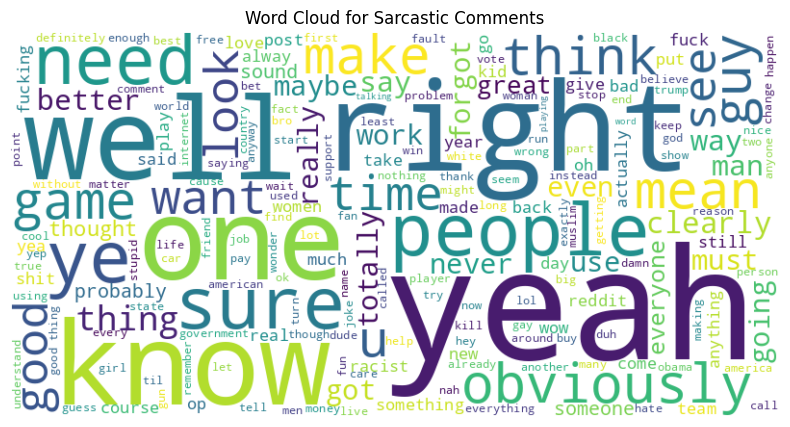

In [ ]:
# # WordCloud for sarcastic comments
# wordcloud_sarc = WordCloud(width=800, height=400, background_color='white').generate(' '.join([' '.join(sentence) for sentence in clean_sarc]))

# # Display the generated word cloud using matplotlib
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud_sarc, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for Sarcastic Comments')
# plt.show()


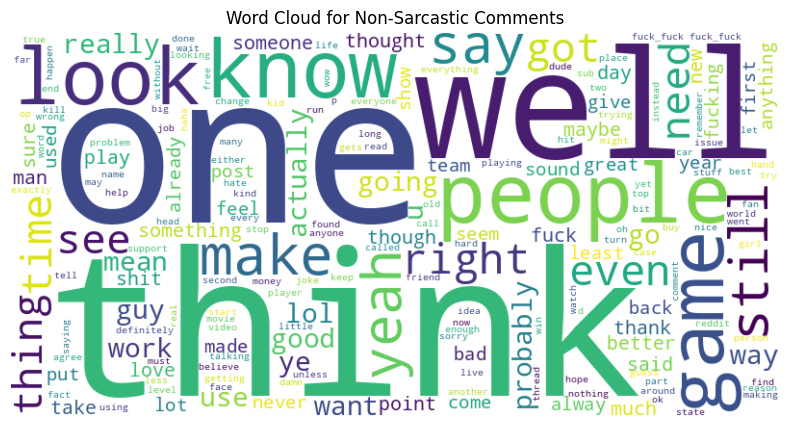

In [ ]:
# # WordCloud for sarcastic comments
# wordcloud_sarc = WordCloud(width=800, height=400, background_color='white').generate(' '.join([' '.join(sentence) for sentence in clean_non_sarc]))

# # Display the generated word cloud using matplotlib
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud_sarc, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for Non-Sarcastic Comments')
# plt.show()

# Visualizing Sarcastic Comments by Subreddit

In [ ]:
# subreddit_count = sarcastic_com['subreddit'].value_counts()

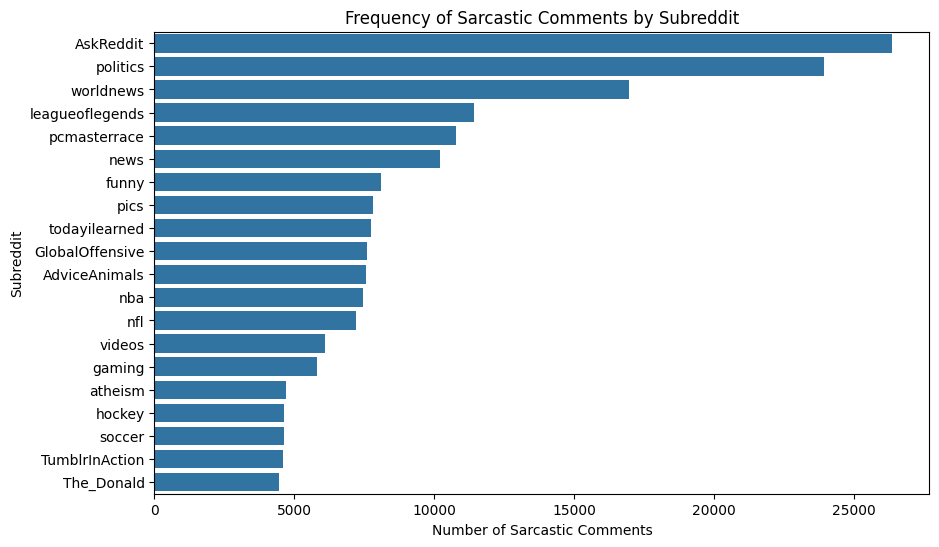

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# top = subreddit_count.head(20)
# plt.figure(figsize=(10, 6))
# sns.barplot(x=top.values, y=top.index)
# plt.xlabel('Number of Sarcastic Comments')
# plt.ylabel('Subreddit')
# plt.title('Frequency of Sarcastic Comments by Subreddit')
# plt.show()


## Train Logistic Regression model (baseline)

In [ ]:
from sklearn.model_selection import train_test_split
comments = train_bal['comment']
# Create a new column 'merged_comment' by concatenating 'comment' and 'parent_comment'
train_bal['merged_comment'] = train_bal['comment'] + ' ' + train_bal['parent_comment']

labels = train_bal['label']

X_train, X_test, y_train, y_test = train_test_split(train_bal['merged_comment'], labels, test_size=0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(566032,)
(242586,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# build bigrams
# and minimal word frequency
tf_idf = TfidfVectorizer(ngram_range=(1, 2), min_df=2, lowercase=False)
# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(C=1, n_jobs=-1, solver='lbfgs',
                           random_state=42, verbose=1)
# sklearn's pipeline
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf),
                                 ('logit', logit)])

In [ ]:
%%time
tfidf_logit_pipeline.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


CPU times: user 50.5 s, sys: 2.18 s, total: 52.7 s
Wall time: 1min 53s


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(lowercase=False, min_df=2,
                                 ngram_range=(1, 2))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=-1, random_state=42,
                                    verbose=1))])

In [ ]:
%%time
valid_pred = tfidf_logit_pipeline.predict(X_test)

CPU times: user 17.3 s, sys: 258 ms, total: 17.5 s
Wall time: 18.9 s


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, valid_pred)

0.6860412389832884

## Stacking with parent comment

In [ ]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_comment = TfidfVectorizer(ngram_range=(1, 2), min_df=2, lowercase=False)
tf_idf_parent_comment = TfidfVectorizer(ngram_range=(1, 2), min_df=2, lowercase=False)

comment_vectors = tf_idf_comment.fit_transform(train_bal['comment'])
parent_comment_vectors = tf_idf_parent_comment.fit_transform(train_bal['parent_comment'])

# Concatenate the TF-IDF vectors horizontally
combined_vectors = hstack([comment_vectors, parent_comment_vectors])

In [ ]:
# Inspect TF-IDF vectors and their size
print("TF-IDF vectors for comments:")
print(comment_vectors)
print("Size of comment_vectors:", comment_vectors.shape)

print("\nTF-IDF vectors for parent comments:")
print(parent_comment_vectors)
print("Size of parent_comment_vectors:", parent_comment_vectors.shape)

TF-IDF vectors for comments:
  (0, 505784)	0.3248620472480377
  (0, 348990)	0.2470044554066796
  (0, 133099)	0.29406976103717763
  (0, 552727)	0.2242251089154471
  (0, 246954)	0.31937729053749464
  (0, 560734)	0.3319331284784384
  (0, 106789)	0.2865636330680387
  (0, 136552)	0.07315273053713169
  (0, 100013)	0.304929788758023
  (0, 502387)	0.056193830442844164
  (0, 348960)	0.20309361263092413
  (0, 132781)	0.14264889823981622
  (0, 552708)	0.1319679753080063
  (0, 246832)	0.17434730453055758
  (0, 42456)	0.304929788758023
  (0, 301922)	0.18258533874469954
  (0, 560575)	0.15824291020403788
  (0, 415199)	0.20034833696591325
  (1, 259962)	0.5481666720976881
  (1, 585458)	0.6058121890238021
  (1, 259925)	0.4833157198823622
  (1, 584405)	0.2502471470183383
  (1, 502387)	0.19049191992132122
  (2, 125286)	0.40475143866966923
  (2, 134956)	0.32758974154797776
  :	:
  (808616, 164354)	0.08852396359616435
  (808616, 320180)	0.13480532347159851
  (808616, 129195)	0.0987207178880377
  (808616, 36

In [ ]:
from sklearn.linear_model import LogisticRegression

labels = train_bal['label']
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_vectors, labels, test_size=0.2, random_state=22)

logit = LogisticRegression(C=1, n_jobs=-1, solver='lbfgs',
                           random_state=22, verbose=1)

logit.fit(X_train, y_train)
valid_pred = logit.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, valid_pred)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.7218594642724642

## Using non-text covariates

In [ ]:
train_bal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010773 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010773 non-null  object
 3   subreddit       1010773 non-null  object
 4   score           1010773 non-null  int64 
 5   ups             1010773 non-null  int64 
 6   downs           1010773 non-null  int64 
 7   date            1010773 non-null  object
 8   created_utc     1010773 non-null  object
 9   parent_comment  1010773 non-null  object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


### Author

In [ ]:
train_bal['author'].nunique()

256560

In [ ]:
train_bal['subreddit'].nunique()

14876

In [ ]:
train_bal.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [ ]:
# Sarcastic authors
train_bal[train_bal['label'] == 1].groupby('author').size().sort_values(ascending=False).head(5)

author
Biffingston       331
NeonDisease       176
pokemon_fetish    168
ShyBiDude89       154
ivsciguy          135
dtype: int64

In [ ]:
# Least sarcastic authors
train_bal[train_bal['label'] == 0].groupby('author').size().sort_values(ascending=False).head(5)

author
Biffingston       333
pokemon_fetish    179
NeonDisease       167
ShyBiDude89       162
ivsciguy          141
dtype: int64

It seems that the authors with the most sarcastic comments are also the ones with the most non-sarcastic comments. Maybe author isn't a valuable predictor for sarcasm. We can test this by performing a chi-squared test.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(train_bal['author'], train_bal['label'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}\nP-value: {p}")

Chi-square value: 77304.88045671374
P-value: 1.0


With our statistical test, we see that there is very little correlation between these variables, this means that the author variable might add unwanted noise to our model and might not be worth including.

### Subreddit

In [ ]:
# Sarcastic subreddits
train_bal[train_bal['label'] == 1].groupby('subreddit').size().sort_values(ascending=False).head(5)

subreddit
AskReddit          21050
politics           19088
worldnews          13647
leagueoflegends     9178
pcmasterrace        8672
dtype: int64

In [ ]:
# Non-Sarcastic subreddits
train_bal[train_bal['label'] == 0].groupby('subreddit').size().sort_values(ascending=False).head(5)

subreddit
AskReddit          31599
politics           12427
funny               7831
leagueoflegends     7709
worldnews           7564
dtype: int64

In [ ]:
train_bal['subreddit'].nunique()

13561

In [ ]:
top_subreddits = train_bal['subreddit'].value_counts(ascending=False).head(10).index
subreddit_filter = train_bal[train_bal['subreddit'].isin(top_subreddits)]

subreddit_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201044 entries, 522142 to 55102
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           201044 non-null  int64 
 1   comment         201044 non-null  object
 2   author          201044 non-null  object
 3   subreddit       201044 non-null  object
 4   score           201044 non-null  int64 
 5   ups             201044 non-null  int64 
 6   downs           201044 non-null  int64 
 7   date            201044 non-null  object
 8   created_utc     201044 non-null  object
 9   parent_comment  201044 non-null  object
dtypes: int64(4), object(6)
memory usage: 16.9+ MB


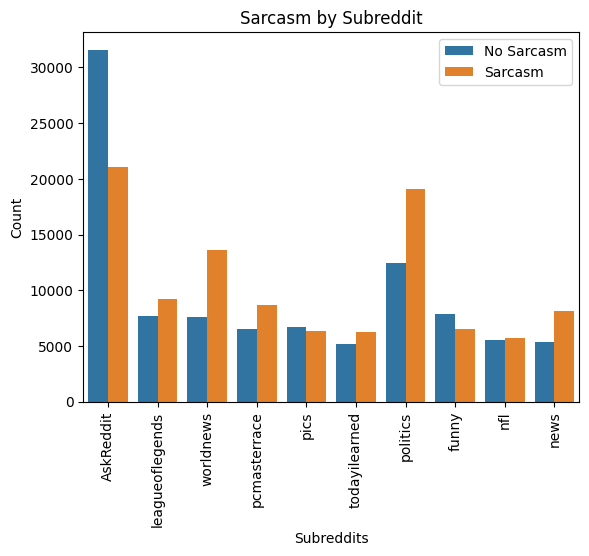

In [ ]:
sns.countplot(x='subreddit', hue='label', data=subreddit_filter)
plt.title('Sarcasm by Subreddit')
plt.xlabel('Subreddits')
plt.ylabel('Count')
plt.legend(labels=['No Sarcasm', 'Sarcasm'])
plt.xticks(rotation=90)
plt.show()

We get a promising plot that our covariate `subreddit` may have some influence on our sarcasm label. Let's test this with a chi-squared test.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(train_bal['subreddit'], train_bal['label'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}\nP-value: {p}")

Chi-square value: 41937.59079105001
P-value: 0.0


We get a statistically significant result with a p-value of 0. Let's test this with our reduced subreddit dataset.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(subreddit_filter['subreddit'], subreddit_filter['label'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}\nP-value: {p}")

Chi-square value: 6180.178481507348
P-value: 0.0


Still a significant value, this means `subreddit` is a valuable feature for predicting sarcasm.

### Up and Down Votes

In [ ]:
# Filter dataset
Votes = train_bal[['score', 'ups', 'downs', 'label']]
Votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808618 entries, 522142 to 213871
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   score   808618 non-null  int64
 1   ups     808618 non-null  int64
 2   downs   808618 non-null  int64
 3   label   808618 non-null  int64
dtypes: int64(4)
memory usage: 63.1 MB


In [ ]:
from scipy.stats import pearsonr

voting_corr = Votes.corr()

# Create an empty DataFrame to store p-values
p_values = pd.DataFrame(index=voting_corr.index, columns=voting_corr.columns)

# Loop through pairs of variables and calculate correlation and p-value
for col1 in voting_corr.columns:
    for col2 in voting_corr.index:
        corr, p_value = pearsonr(Votes[col1], Votes[col2])
        p_values.loc[col1, col2] = p_value

In [ ]:
train_bal.describe()

,label,score,ups,downs
count,808618.000000,808618.000000,808618.000000,808618.000000
mean,0.500074,6.895741,5.505993,-0.145953
std,0.500000,48.303992,41.560255,0.353059
min,0.000000,-312.000000,-312.000000,-1.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,0.000000
75%,1.000000,4.000000,3.000000,0.000000
max,1.000000,9070.000000,5163.000000,0.000000


In [ ]:
train_bal['ups'].median()

1.0

In [ ]:
voting_corr

,score,ups,downs,label
score,1.000000,0.855886,-0.013917,-0.009628
ups,0.855886,1.000000,0.064714,-0.006520
downs,-0.013917,0.064714,1.000000,0.057738
label,-0.009628,-0.006520,0.057738,1.000000


In [ ]:
p_values

,score,ups,downs,label
score,0.0,0.0,0.0,0.0
ups,0.0,0.0,0.0,0.0
downs,0.0,0.0,0.0,0.0
label,0.0,0.0,0.0,0.0


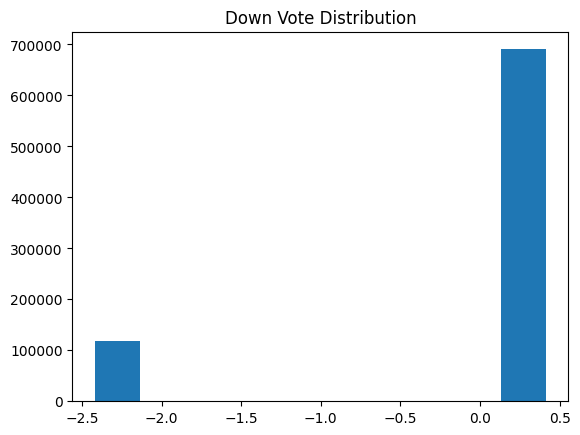

In [ ]:
plt.hist(Votes['downs'])
plt.title('Down Vote Distribution')
plt.show()

In [ ]:
Votes['ups'].nunique()

1067

In [ ]:
Votes['ups'].max()

124.09686118363591

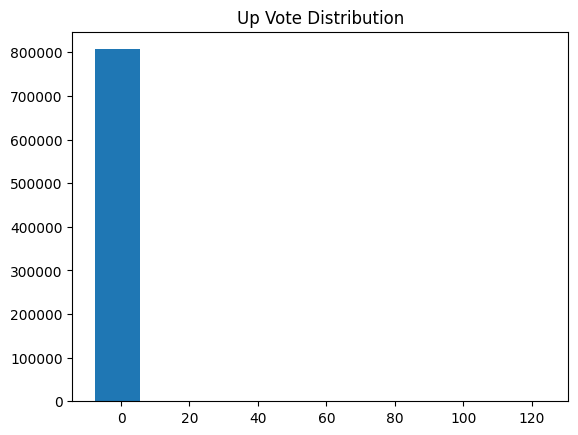

In [ ]:
import numpy as np

plt.hist(Votes['ups'])
plt.title('Up Vote Distribution')
plt.show()

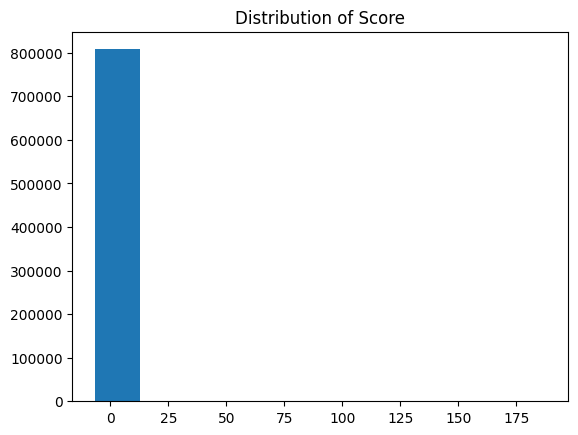

In [ ]:
plt.hist(Votes['score'])
plt.title('Distribution of Score')
plt.show()

In [ ]:
train_bal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808618 entries, 522142 to 213871
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           808618 non-null  int64 
 1   comment         808618 non-null  object
 2   author          808618 non-null  object
 3   subreddit       808618 non-null  object
 4   score           808618 non-null  int64 
 5   ups             808618 non-null  int64 
 6   downs           808618 non-null  int64 
 7   date            808618 non-null  object
 8   created_utc     808618 non-null  object
 9   parent_comment  808618 non-null  object
dtypes: int64(4), object(6)
memory usage: 67.9+ MB


Maybe train a model only with voting variables to see influence?

### Date

In [ ]:
train_bal['date'].head()

522142    2015-07
907864    2013-03
604170    2015-10
110635    2016-12
997758    2010-01
Name: date, dtype: object

In [ ]:
train_bal['date'] = pd.to_datetime(train_bal['date']) # Run this to convert date to date_time
train_bal['date'].head()

0   2015-07-01
1   2013-03-01
2   2015-10-01
3   2016-12-01
4   2010-01-01
Name: date, dtype: datetime64[ns]

In [ ]:
train_bal['created_utc'].head()

522142    2015-07-11 01:55:53
907864    2013-03-14 03:03:46
604170    2015-10-21 23:22:17
110635    2016-12-05 03:50:18
997758    2010-01-17 21:32:40
Name: created_utc, dtype: object

`date` and `created_utc` may hold significance in our sarcastic prediction task. Maybe sarcastic comments are more prevelant during certain times of the year and maybe more prevelant during times of the day as well.

#### Month

In [ ]:
monthly_counts = train_bal.groupby(['label', train_bal['date'].dt.month])['date'].count().unstack()
monthly_counts

date,1,2,3,4,5,6,7,8,9,10,11,12
label,,,,,,,,,,,,
0,24735,23921,27177,28251,30346,31236,35275,36694,36058,40876,42209,47471
1,26689,25475,28540,29402,31551,32782,36317,37553,36055,38948,39413,41644


In [ ]:
monthly_counts.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='date')

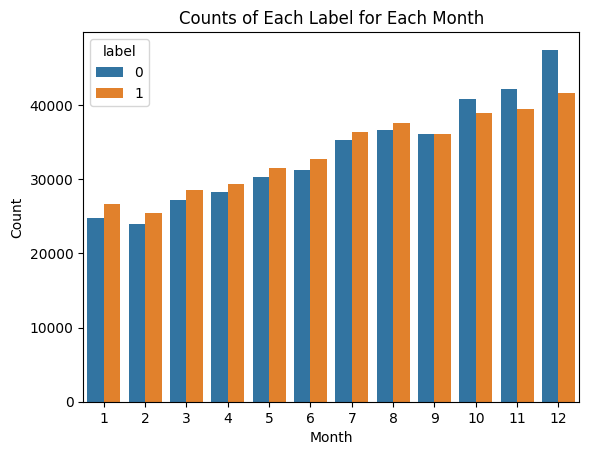

In [ ]:
# Melt the DataFrame to have a 'month' column
monthly_counts_melted = monthly_counts.reset_index().melt(id_vars=['label'], var_name='month', value_name='count')

# Plot the counts using a bar plot
sns.barplot(x='month', y='count', hue='label', data=monthly_counts_melted)
plt.title('Counts of Each Label for Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

It seems that there are more sarcastic comments at the beginning of the year and more non-sarcastic comments towards the end of the year.<br>We can perform a statistical test to see if there's a relationship between month and sarcasm label.

In [ ]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = monthly_counts_melted.pivot_table(values='count', index='month', columns='label', fill_value=0)

contingency_table

label,0,1
month,,
1,24735,26689
2,23921,25475
3,27177,28540
4,28251,29402
5,30346,31551
6,31236,32782
7,35275,36317
8,36694,37553
9,36058,36055


In [ ]:
# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the result
print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")

Chi-square value: 788.6968216862591
P-value: 5.061000950674154e-162


There is a statistically significant relationship between months and sarcasm counts. <br>This tells us that including the `month` variable into our dataframe might be good for prediction.

#### Year

In [ ]:
yearly_counts = train_bal.groupby(['label', train_bal['date'].dt.year])['date'].count().unstack()
yearly_counts

date,2009,2010,2011,2012,2013,2014,2015,2016
label,,,,,,,,
0,614,1821,4658,10153,23405,51315,110068,202215
1,876,2428,5540,11685,27439,58816,119139,178446


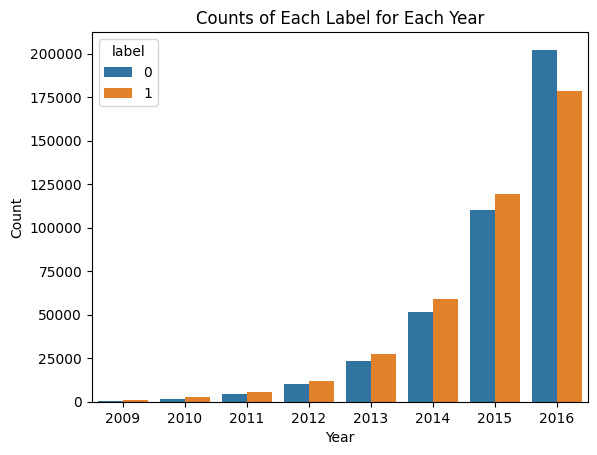

In [ ]:
# Melt the DataFrame to have a 'month' column
yearly_counts_melted = yearly_counts.reset_index().melt(id_vars=['label'], var_name='year', value_name='count')

# Plot the counts using a bar plot
sns.barplot(x='year', y='count', hue='label', data=yearly_counts_melted)
plt.title('Counts of Each Label for Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# Create a contingency table
contingency_table = yearly_counts_melted.pivot_table(values='count', index='year', columns='label', fill_value=0)

contingency_table

label,0,1
year,,
2009,614,876
2010,1821,2428
2011,4658,5540
2012,10153,11685
2013,23405,27439
2014,51315,58816
2015,110068,119139
2016,202215,178446


In [ ]:
# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the result
print(f"Chi-square value: {chi2}")
print(f"P-value: {p_value}")

Chi-square value: 2990.6341155922037
P-value: 0.0


I don't know if `year` would have the same predictive power as `month` because it is not cyclic and has much less data.

### UTC

In [ ]:
train_bal['created_utc'] = pd.to_datetime(train_bal['created_utc']) # Run this to convert created_utc to date_time
train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      808618 non-null  int64         
 1   label           808618 non-null  int64         
 2   comment         808618 non-null  object        
 3   author          808618 non-null  object        
 4   subreddit       808618 non-null  object        
 5   score           808618 non-null  int64         
 6   ups             808618 non-null  int64         
 7   downs           808618 non-null  int64         
 8   date            808618 non-null  datetime64[ns]
 9   created_utc     808618 non-null  datetime64[ns]
 10  parent_comment  808618 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 67.9+ MB


In [ ]:
train_bal['hour'] = train_bal['created_utc'].dt.hour # Run this to feature engineer hour variable

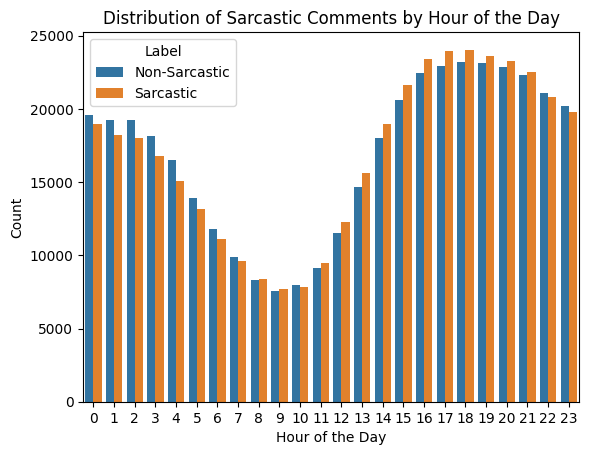

In [ ]:
sns.countplot(x='hour', hue='label', data=train_bal)
plt.title('Distribution of Sarcastic Comments by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Non-Sarcastic', 'Sarcastic'])
plt.show()

Interestingly enough, it seems like there are more sarcastic comments in the evening, around the time people come back from work/school. There are less sarcastic comments in the morning.

In [ ]:
train_bal['date'].dt.day_of_week.nunique()

7

In [ ]:
train_bal['month'] = train_bal['date'].dt.month # Run this cell to add month and day of week variables
# train_bal['year'] = train_bal['date'].dt.year
train_bal['dow'] = train_bal['date'].dt.day_of_week
train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      808618 non-null  int64         
 1   label           808618 non-null  int64         
 2   comment         808618 non-null  object        
 3   author          808618 non-null  object        
 4   subreddit       808618 non-null  object        
 5   score           808618 non-null  int64         
 6   ups             808618 non-null  int64         
 7   downs           808618 non-null  int64         
 8   date            808618 non-null  datetime64[ns]
 9   created_utc     808618 non-null  datetime64[ns]
 10  parent_comment  808618 non-null  object        
 11  hour            808618 non-null  int64         
 12  month           808618 non-null  int64         
 13  dow             808618 non-null  int64         
dtypes: datetime64[ns](2), int64(8), obje

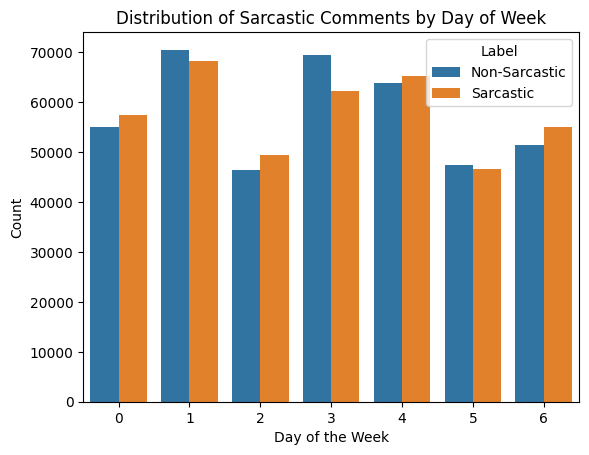

In [ ]:
sns.countplot(x='dow', hue='label', data=train_bal)
plt.title('Distribution of Sarcastic Comments by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Non-Sarcastic', 'Sarcastic'])
plt.show()

In [ ]:
# Group by hour, month_name, and label, and calculate the count
grouped_time = train_bal.groupby(['hour', 'month', 'label']).size().reset_index(name='count')

grouped_time

,hour,month,label,count
0,0,1,0,1261
1,0,1,1,1358
2,0,2,0,1174
3,0,2,1,1290
4,0,3,0,1388
...,...,...,...,...
571,23,10,1,1837
572,23,11,0,2192
573,23,11,1,2103
574,23,12,0,2427


After doing this analysis, it seems like month and hour would be valuable variables to include in our model because they have variance with the target label, i.e. sarcastic comments vary by time.

## Logistic Regression (non-text covariates)

---
We plan on building an initial model with all variables included to see a a few things: performance, runtime, and feature importance.<br>If the model runs slow, we might consider pruning our dataset, if it performs poorly we might perform feature selection.<br>We have initial theories as to which variables are most important based on their variance with the target label but we want to implement a model with all the data initially.


---



### Data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      808618 non-null  int64         
 1   label           808618 non-null  int64         
 2   comment         808618 non-null  object        
 3   author          808618 non-null  object        
 4   subreddit       808618 non-null  object        
 5   score           808618 non-null  int64         
 6   ups             808618 non-null  int64         
 7   downs           808618 non-null  int64         
 8   date            808618 non-null  datetime64[ns]
 9   created_utc     808618 non-null  datetime64[ns]
 10  parent_comment  808618 non-null  object        
 11  hour            808618 non-null  int64         
 12  month           808618 non-null  int64         
 13  year            808618 non-null  int64         
dtypes: datetime64[ns](2), int64(8), obje

In [ ]:
# Drop unneeded columns
train = train_bal.drop(columns=['Unnamed: 0', 'date', 'created_utc', 'author', 'comment', 'parent_comment'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   label      808618 non-null  int64 
 1   subreddit  808618 non-null  object
 2   score      808618 non-null  int64 
 3   ups        808618 non-null  int64 
 4   downs      808618 non-null  int64 
 5   hour       808618 non-null  int64 
 6   month      808618 non-null  int64 
 7   dow        808618 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 49.4+ MB


In [ ]:
# # One-hot encode subreddit
# subreddit_dummies = pd.get_dummies(train_bal['subreddit'])

In [ ]:
# # Combine one-hot encoded categorical variables with numeric variables
# train_encoded = pd.concat([train, subreddit_dummies], axis=1)
# train_encoded.info()

The code above crashed our google colab because of lack of RAM. We might need to filter our subreddits.

We have 3 potential options:
<li>Pay for more compute in google colab</li>
<li>Locally merge subreddit dummies into train df and upload to colab</li>
<li>Try computing on ROAR</li>
<li>Saving dummies into file and then concatenate</li>
<li>Batch append variables (for loop)</li>
<li>Maybe group subreddits</li>

In [ ]:
# # Define the batch size
# batch_size = 10  # Adjust this value based on your available memory and desired batch size

# # Calculate the number of batches
# num_batches = len(subreddit_dummies) // batch_size + 1

# # Concatenate in batches
# concatenated_dfs = []
# for i in range(num_batches):
#     start_idx = i * batch_size
#     end_idx = (i + 1) * batch_size
#     if end_idx > len(subreddit_dummies):
#         end_idx = len(subreddit_dummies)
#     subset_dummies = subreddit_dummies.iloc[start_idx:end_idx]
#     concatenated_df = pd.concat([train, subset_dummies], axis=1)
#     concatenated_dfs.append(concatenated_df)

# # Concatenate all batches
# train_concat = pd.concat(concatenated_dfs)

Concatenating in batch sizes also didn't work which leads me to believe it is a problem concatenating the amount of columns. Therefore, I propose we keep the top 50 or so subreddits with the most comments and assign the remaining subreddits to one single group `other`.

In [ ]:
train['subreddit'].nunique() # 13,561 different subreddits

13561

In [ ]:
subreddit_counts = train_bal.groupby('subreddit').size().sort_values(ascending=False)
subreddit_counts.head()

subreddit
AskReddit          52649
politics           31515
worldnews          21211
leagueoflegends    16887
pcmasterrace       15233
dtype: int64

In [ ]:
# Calculate the 5% quantile
quantile_5 = subreddit_counts.quantile(0.95)

# Select subreddits whose counts are greater than or equal to the 5% quantile
top_subreddits = subreddit_counts[subreddit_counts >= quantile_5]
top_subreddits.size # 680 subreddits in the top 5%

680

In [ ]:
top_subreddits.tail()

subreddit
funhaus     131
steroids    130
running     130
climbing    130
SFGiants    130
dtype: int64

In [ ]:
subreddits = top_subreddits.index.tolist()
subreddits[:5]

['AskReddit', 'politics', 'worldnews', 'leagueoflegends', 'pcmasterrace']

In [ ]:
def filter_subreddit(subreddit):
    if subreddit in subreddits:
        return subreddit
    else:
        return 'other'

# Apply the filter_subreddit function to the 'subreddit' column
train['subreddit'] = train['subreddit'].apply(filter_subreddit)

train['subreddit'].nunique()

681

In [ ]:
# Most popular subreddits
train.groupby('subreddit').size().sort_values(ascending=False).head(10)

subreddit
other              119077
AskReddit           52649
politics            31515
worldnews           21211
leagueoflegends     16887
pcmasterrace        15233
funny               14343
news                13529
pics                12998
todayilearned       11373
dtype: int64

In [ ]:
top_subreddits = train['subreddit'].value_counts(ascending=False).head(10).index
subreddit_filter = train[train['subreddit'].isin(top_subreddits)]

subreddit_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308815 entries, 0 to 808617
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   label      308815 non-null  int64 
 1   subreddit  308815 non-null  object
 2   score      308815 non-null  int64 
 3   ups        308815 non-null  int64 
 4   downs      308815 non-null  int64 
 5   hour       308815 non-null  int64 
 6   month      308815 non-null  int64 
 7   dow        308815 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 21.2+ MB


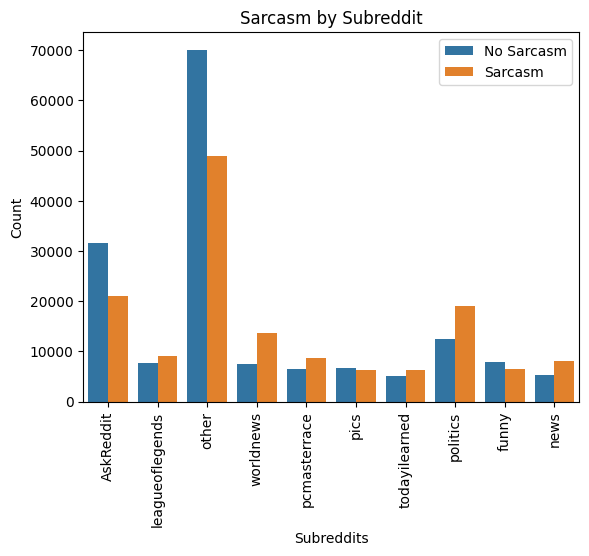

In [ ]:
sns.countplot(x='subreddit', hue='label', data=subreddit_filter)
plt.title('Sarcasm by Subreddit')
plt.xlabel('Subreddits')
plt.ylabel('Count')
plt.legend(labels=['No Sarcasm', 'Sarcasm'])
plt.xticks(rotation=90)
plt.show()

It seems like the lesser-used subreddits contain more non-sarcastic comments.

In [ ]:
# One-hot encode subreddit
subreddit_dummies = pd.get_dummies(train['subreddit'])

In [ ]:
# Combine one-hot encoded categorical variables with numeric variables
train_encoded = pd.concat([train, subreddit_dummies], axis=1)
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Columns: 689 entries, label to yugioh
dtypes: int64(7), object(1), uint8(681)
memory usage: 574.5+ MB


In [ ]:
train_encoded.drop(columns='subreddit', inplace=True)

In [ ]:
train_encoded.shape

(808618, 688)

In [ ]:
train_encoded.head()

,label,score,ups,downs,hour,month,dow,2007scape,3DS,49ers,...,wisconsin,witcher,woahdude,woodworking,worldnews,worldpolitics,wow,xboxone,youtubehaiku,yugioh
0,0,2,2,0,1,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,3,3,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,23,10,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,-1,-1,3,12,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,4,0,21,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train_encoded.drop(columns='label')
y = train_encoded['label']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=22)

print(X_train.shape)
print(X_val.shape)

(646894, 687)
(161724, 687)


In [ ]:
sc = StandardScaler() # Scale variables

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

print(X_train.shape)
print(X_val.shape)

(646894, 687)
(161724, 687)


In [ ]:
logit = LogisticRegression(random_state=22)

logit.fit(X_train, y_train)

y_pred = logit.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_val, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_val, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_val, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.571851
Precision: 0.568269
Recall: 0.591461
F1 score: 0.579633
ROC AUC: 0.571887


## Baseline performance with Comment only

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(train_bal['comment'], train_bal['label'], test_size=0.2, random_state=22)
print(X_train.shape)
print(X_val.shape)

(646894,)
(161724,)


In [ ]:
# build bigrams, put a limit on maximal number of features
# and minimal word frequency
tf_idf = TfidfVectorizer(ngram_range=(1, 2), max_features=50000, min_df=2)
# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(C=1, n_jobs=-1, solver='lbfgs',
                           random_state=17, verbose=1)
# sklearn's pipeline
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf),
                                 ('logit', logit)])

In [ ]:
%%time
tfidf_logit_pipeline.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


CPU times: user 49.4 s, sys: 1.01 s, total: 50.4 s
Wall time: 1min 19s


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=2,
                                 ngram_range=(1, 2))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=-1, random_state=17,
                                    verbose=1))])

In [ ]:
%%time
y_pred = tfidf_logit_pipeline.predict(X_val)

CPU times: user 7.57 s, sys: 24.3 ms, total: 7.59 s
Wall time: 14 s


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_val, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_val, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_val, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.718372
Precision: 0.735237
Recall: 0.680890
F1 score: 0.707021
ROC AUC: 0.718303


### Inference

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=a34f6315ebd5605f0214b7003e16ad7e39e1e548e2e3a709314bec42d1a326e2
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


This code will display the weights associated with each feature (word) in our logistic regression model. It will help us understand which words/phrases contribute most to the prediction of sarcasm/non-sarcasm.

In [ ]:
import eli5
eli5.show_weights(estimator=tfidf_logit_pipeline.named_steps['logit'],
                  vec=tfidf_logit_pipeline.named_steps['tf_idf'])

Weight?,Feature
+9.151,x49063
+7.511,x27653
+7.272,x48831
+7.154,x8111
+6.898,x44120
+6.359,x4980
+6.286,x18522
+5.259,x15004
+5.231,x33614
+5.170,x15812


## Train Logit with text and non-text covars

In [ ]:
import pandas as pd

train_bal = pd.read_csv('/content/drive/MyDrive/Sarcasm_Data/Train_Balanced.csv')   # Make sure path is correct in your google drive
train_bal.head()

,Unnamed: 0,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,522142,0,"I personally wasn't a huge Garrosh fan, I've a...",cromemako83,AskReddit,2,2,0,2015-07-01,2015-07-11 01:55:53,Fuck Vol'jin. Garrosh Hellscream did nothing w...
1,907864,1,you forgot the,_SharkWeek_,AskReddit,1,1,0,2013-03-01,2013-03-14 03:03:46,That's a lie fed to you by the LIEberal media....
2,604170,1,"Nah man, she's clearly an ad carry",jdswift13,leagueoflegends,1,1,0,2015-10-01,2015-10-21 23:22:17,she isnt already?
3,110635,1,This sub in a nutshell.,trickz-M-,GlobalOffensive,1,-1,-1,2016-12-01,2016-12-05 03:50:18,Cloud 9 Qualify! (ONLY C9 FANS ALLOWED(
4,997758,0,Yes... I do.,guriboysf,videos,4,4,0,2010-01-01,2010-01-17 21:32:40,"""so, i hear you have a fat cock."""


In [ ]:
# train_bal['exclamation_count'] = train_bal['comment'].apply(lambda x: x.count('!'))


# train_bal['questionmark_count'] = train_bal['comment'].apply(lambda x: x.count('?'))


# train_bal['period_count'] = train_bal['comment'].apply(lambda x: x.count('.'))


# train_bal['space_count'] = train_bal['comment'].apply(lambda x: x.count('_'))


# train_bal['slash_count'] = train_bal['comment'].apply(lambda x: x.count('/'))


# train_bal['elips_count'] = train_bal['comment'].apply(lambda x: x.count(':'))


# import pandas as pd

# train_bal['capital_letters_count'] = train_bal['comment'].apply(lambda x: sum(1 for char in x if char.isupper()))



# train_bal['word_count'] = train_bal['comment'].apply(lambda x: len(x.split()))


# import pandas as pd
# import string

# def count_punctuation(comment):
#     return sum(1 for char in comment if char in string.punctuation)


# train_bal['total_punctuation'] = train_bal['comment'].apply(count_punctuation)

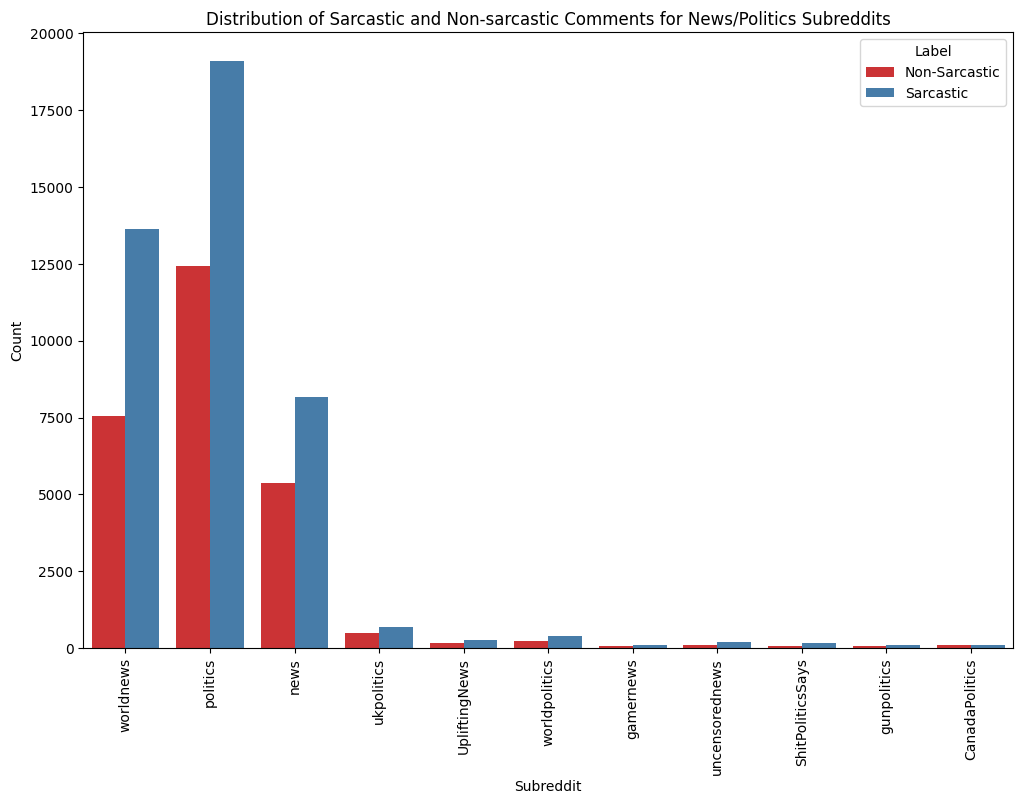

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define keywords related to news or politics
# news_politics_keywords = ['news', 'politics', 'worldnews', 'worldpolitics', 'uspolitics', 'worldnews', 'worldpolitics']

# # Calculate the count of occurrences of each subreddit
# subreddit_counts = train_bal['subreddit'].value_counts()

# # Filter DataFrame for subreddits with more than 100 occurrences and containing keywords
# news_politics_comments = train_bal[train_bal['subreddit'].isin(subreddit_counts[subreddit_counts > 100].index) &
#                                     train_bal['subreddit'].str.contains('|'.join(news_politics_keywords), case=False)]

# # Plot countplot for all filtered subreddits combined
# plt.figure(figsize=(12, 8))
# sns.countplot(x='subreddit', hue='label', data=news_politics_comments, palette='Set1')
# plt.title('Distribution of Sarcastic and Non-sarcastic Comments for News/Politics Subreddits')
# plt.xlabel('Subreddit')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.legend(title='Label', labels=['Non-Sarcastic', 'Sarcastic'])
# plt.show()


<ipython-input-25-932c312c2713>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=news_politics_comments, palette='Set1')


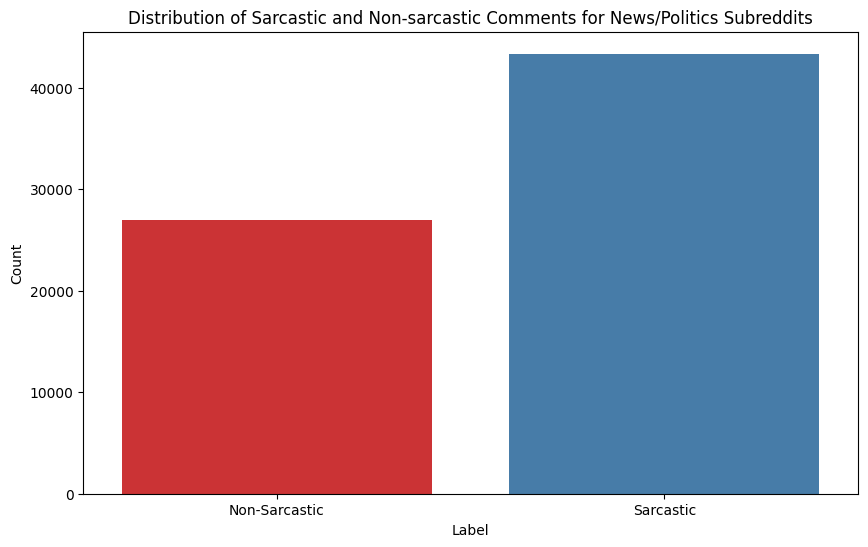

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'train_bal' is your DataFrame and 'label' indicates sarcastic/non-sarcastic comments

# # Define keywords related to news or politics
# news_politics_keywords = ['news', 'politics', 'worldnews', 'worldpolitics', 'uspolitics', 'worldnews', 'worldpolitics']

# # Filter DataFrame for subreddits containing keywords
# news_politics_comments = train_bal[train_bal['subreddit'].str.contains('|'.join(news_politics_keywords), case=False)]

# # Plot the count of sarcastic and non-sarcastic comments for subreddits related to news or politics
# plt.figure(figsize=(10, 6))
# sns.countplot(x='label', data=news_politics_comments, palette='Set1')
# plt.title('Distribution of Sarcastic and Non-sarcastic Comments for News/Politics Subreddits')
# plt.xlabel('Label')
# plt.ylabel('Count')
# plt.xticks(ticks=[0, 1], labels=['Non-Sarcastic', 'Sarcastic'])
# plt.show()

In [ ]:
import pandas as pd

# Assuming 'train_bal' is your DataFrame and 'label' indicates sarcastic/non-sarcastic comments

# Calculate the distribution of sarcastic and non-sarcastic comments for each subreddit
subreddit_counts = train_bal.groupby('subreddit')['label'].value_counts(normalize=True).unstack().fillna(0)

# Define bins for categorizing subreddits based on the percentage of sarcastic comments
bins = [0.1 * i for i in range(11)]  # 0.0, 0.1, ..., 1.0

# Map each category to the midpoint of its range as a numeric value between 0 and 1
subreddit_numeric_category = pd.cut(subreddit_counts[1], bins=bins, labels=[0.05 + 0.1 * i for i in range(10)], include_lowest=True)

# Label remaining subreddits as 'other' and update the DataFrame
train_bal['subreddit_sarcasm_numeric'] = train_bal['subreddit'].map(subreddit_numeric_category).fillna(0.5)  # Fill NaN with 0.5 for 'other' subreddits

# Define keywords related to political subreddits
political_keywords = ['politics', 'political', 'government', 'elections', 'congress', 'policy', 'politicalhumor', 'news', 'uspolitics', 'worldnews', 'worldpolitics']

# Create a new column indicating whether a subreddit is political or not
train_bal['political_subreddit'] = train_bal['subreddit'].str.contains('|'.join(political_keywords), case=False)

# Convert the boolean values to categorical (0 for non-political, 1 for political)
train_bal['political_subreddit'] = train_bal['political_subreddit'].astype(int)

train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Unnamed: 0                 808618 non-null  int64   
 1   label                      808618 non-null  int64   
 2   comment                    808618 non-null  object  
 3   author                     808618 non-null  object  
 4   subreddit                  808618 non-null  object  
 5   score                      808618 non-null  int64   
 6   ups                        808618 non-null  int64   
 7   downs                      808618 non-null  int64   
 8   date                       808618 non-null  object  
 9   created_utc                808618 non-null  object  
 10  parent_comment             808618 non-null  object  
 11  subreddit_sarcasm_numeric  808618 non-null  category
 12  political_subreddit        808618 non-null  int64   
dtypes: category(1)

In [ ]:
train_bal.political_subreddit.value_counts()

0    736751
1     71867
Name: political_subreddit, dtype: int64

In [ ]:
train_bal.head()

,Unnamed: 0,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,subreddit_sarcasm_numeric,political_subreddit
0,522142,0,"I personally wasn't a huge Garrosh fan, I've a...",cromemako83,AskReddit,2,2,0,2015-07-01,2015-07-11 01:55:53,Fuck Vol'jin. Garrosh Hellscream did nothing w...,0.35,0
1,907864,1,you forgot the,_SharkWeek_,AskReddit,1,1,0,2013-03-01,2013-03-14 03:03:46,That's a lie fed to you by the LIEberal media....,0.35,0
2,604170,1,"Nah man, she's clearly an ad carry",jdswift13,leagueoflegends,1,1,0,2015-10-01,2015-10-21 23:22:17,she isnt already?,0.55,0
3,110635,1,This sub in a nutshell.,trickz-M-,GlobalOffensive,1,-1,-1,2016-12-01,2016-12-05 03:50:18,Cloud 9 Qualify! (ONLY C9 FANS ALLOWED(,0.55,0
4,997758,0,Yes... I do.,guriboysf,videos,4,4,0,2010-01-01,2010-01-17 21:32:40,"""so, i hear you have a fat cock.""",0.45,0


In [ ]:
train_bal['subreddit_sarcasm_numeric'] = train_bal.subreddit_sarcasm_numeric.astype('float64')
train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 808618 non-null  int64  
 1   label                      808618 non-null  int64  
 2   comment                    808618 non-null  object 
 3   author                     808618 non-null  object 
 4   subreddit                  808618 non-null  object 
 5   score                      808618 non-null  int64  
 6   ups                        808618 non-null  int64  
 7   downs                      808618 non-null  int64  
 8   date                       808618 non-null  object 
 9   created_utc                808618 non-null  object 
 10  parent_comment             808618 non-null  object 
 11  subreddit_sarcasm_numeric  808618 non-null  float64
 12  political_subreddit        808618 non-null  int64  
dtypes: float64(1), int64(6), obje

In [ ]:
# train_bal.head()

,Unnamed: 0,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,subreddit_sarcasm_numeric
0,522142,0,"I personally wasn't a huge Garrosh fan, I've a...",cromemako83,AskReddit,2,2,0,2015-07-01,2015-07-11 01:55:53,Fuck Vol'jin. Garrosh Hellscream did nothing w...,0.35
1,907864,1,you forgot the,_SharkWeek_,AskReddit,1,1,0,2013-03-01,2013-03-14 03:03:46,That's a lie fed to you by the LIEberal media....,0.35
2,604170,1,"Nah man, she's clearly an ad carry",jdswift13,leagueoflegends,1,1,0,2015-10-01,2015-10-21 23:22:17,she isnt already?,0.55
3,110635,1,This sub in a nutshell.,trickz-M-,GlobalOffensive,1,-1,-1,2016-12-01,2016-12-05 03:50:18,Cloud 9 Qualify! (ONLY C9 FANS ALLOWED(,0.55
4,997758,0,Yes... I do.,guriboysf,videos,4,4,0,2010-01-01,2010-01-17 21:32:40,"""so, i hear you have a fat cock.""",0.45


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

train_bal['date'] = pd.to_datetime(train_bal['date']) # Run this to convert date to date_time
train_bal['created_utc'] = pd.to_datetime(train_bal['created_utc']) # Run this to convert created_utc to date_time
train_bal['hour'] = train_bal['created_utc'].dt.hour # Run this to feature engineer hour variable
train_bal['month'] = train_bal['date'].dt.month # Run this cell to add month and day of week variables
train_bal['dow'] = train_bal['date'].dt.day_of_week
train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      808618 non-null  int64         
 1   label           808618 non-null  int64         
 2   comment         808618 non-null  object        
 3   author          808618 non-null  object        
 4   subreddit       808618 non-null  object        
 5   score           808618 non-null  int64         
 6   ups             808618 non-null  int64         
 7   downs           808618 non-null  int64         
 8   date            808618 non-null  datetime64[ns]
 9   created_utc     808618 non-null  datetime64[ns]
 10  parent_comment  808618 non-null  object        
 11  hour            808618 non-null  int64         
 12  month           808618 non-null  int64         
 13  dow             808618 non-null  int64         
dtypes: datetime64[ns](2), int64(8), obje

In [ ]:
# Drop unneeded columns
train = train_bal.drop(columns=['Unnamed: 0', 'date', 'created_utc', 'author', 'ups', 'downs', 'score'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           808618 non-null  int64 
 1   comment         808618 non-null  object
 2   subreddit       808618 non-null  object
 3   parent_comment  808618 non-null  object
dtypes: int64(1), object(3)
memory usage: 24.7+ MB


In [ ]:
X = train.drop(columns=['label', 'comment', 'parent_comment'])
y = train['label']

In [ ]:
sc = StandardScaler() # Scale variables

X = sc.fit_transform(X)
X = pd.DataFrame(X)
train_cat = pd.concat([train, X], axis=1)

In [ ]:
train_cat.drop(columns=['score', 'hour', 'month', 'dow', 'label', 'subreddit_sarcasm_numeric', 'political_subreddit'], inplace=True)
# train_cat.rename(columns={'0':'score', '1':'ups', '2':'downs', '3':'hour', '4':'month', '5':'dow'}, inplace=True)
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   comment         808618 non-null  object 
 1   parent_comment  808618 non-null  object 
 2   0               808618 non-null  float64
 3   1               808618 non-null  float64
 4   2               808618 non-null  float64
 5   3               808618 non-null  float64
 6   4               808618 non-null  float64
 7   5               808618 non-null  float64
dtypes: float64(6), object(2)
memory usage: 49.4+ MB


In [ ]:
# subreddit_counts = train_bal.groupby('subreddit').size().sort_values(ascending=False)
# subreddit_counts.head()

subreddit
AskReddit          52649
politics           31515
worldnews          21211
leagueoflegends    16887
pcmasterrace       15233
dtype: int64

In [ ]:
# # Calculate the 5% quantile
# quantile_5 = subreddit_counts.quantile(0.98)

# # Select subreddits whose counts are greater than or equal to the 5% quantile
# top_subreddits = subreddit_counts[subreddit_counts >= quantile_5]
# top_subreddits.size # 680 subreddits in the top 5%

272

In [ ]:
# subreddits = top_subreddits.index.tolist()
# subreddits[:5]

['AskReddit', 'politics', 'worldnews', 'leagueoflegends', 'pcmasterrace']

In [ ]:
# def filter_subreddit(subreddit):
#     if subreddit in subreddits:
#         return subreddit
#     else:
#         return 'other'

# # Apply the filter_subreddit function to the 'subreddit' column
# train['subreddit'] = train['subreddit'].apply(filter_subreddit)

# train['subreddit'].nunique()

273

In [ ]:
# top_subreddits = train['subreddit'].value_counts(ascending=False).head(10).index
# subreddit_filter = train[train['subreddit'].isin(top_subreddits)]

# subreddit_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402214 entries, 0 to 808617
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   label                      402214 non-null  int64  
 1   comment                    402214 non-null  object 
 2   subreddit                  402214 non-null  object 
 3   score                      402214 non-null  int64  
 4   parent_comment             402214 non-null  object 
 5   subreddit_sarcasm_numeric  402214 non-null  float64
 6   hour                       402214 non-null  int64  
 7   month                      402214 non-null  int64  
 8   dow                        402214 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 30.7+ MB


In [ ]:
# # One-hot encode subreddit
# subreddit_dummies = pd.get_dummies(train['subreddit'])

In [ ]:
# train['subreddit'].nunique()

273

In [ ]:
# # Combine one-hot encoded categorical variables with numeric variables
# train_encoded = pd.concat([train_cat, subreddit_dummies], axis=1)
# train_encoded.head()

,comment,parent_comment,subreddit_sarcasm_numeric,0,1,2,3,4,2007scape,4chan,...,vancouver,vegan,videos,whowouldwin,woahdude,worldnews,worldpolitics,wow,xboxone,yugioh
0,"I personally wasn't a huge Garrosh fan, I've a...",Fuck Vol'jin. Garrosh Hellscream did nothing w...,0.35,-0.101353,-1.231120,-1.581123,-0.032928,-0.461911,0,0,...,0,0,0,0,0,0,0,0,0,0
1,you forgot the,That's a lie fed to you by the LIEberal media....,0.35,-0.122055,-1.231120,-1.308629,-1.205315,0.556223,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Nah man, she's clearly an ad carry",she isnt already?,0.55,-0.122055,0.431901,1.416313,0.846362,0.047156,0,0,...,0,0,0,0,0,0,0,0,0,0
3,This sub in a nutshell.,Cloud 9 Qualify! (ONLY C9 FANS ALLOWED(,0.55,-0.122055,0.431901,-1.308629,1.432556,0.047156,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Yes... I do.,"""so, i hear you have a fat cock.""",0.45,-0.059948,-0.399610,1.143819,-1.791509,0.556223,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# train_encoded.drop(columns=['subreddit'], inplace=True)

In [ ]:
train_encoded = train_cat
train_encoded.shape

(808618, 8)

In [ ]:
train_encoded.head()

,comment,parent_comment,0,1,2,3,4,5
0,"I personally wasn't a huge Garrosh fan, I've a...",Fuck Vol'jin. Garrosh Hellscream did nothing w...,-0.101353,-1.231120,-0.312323,-1.581123,-0.032928,-0.461911
1,you forgot the,That's a lie fed to you by the LIEberal media....,-0.122055,-1.231120,-0.312323,-1.308629,-1.205315,0.556223
2,"Nah man, she's clearly an ad carry",she isnt already?,-0.122055,0.431901,-0.312323,1.416313,0.846362,0.047156
3,This sub in a nutshell.,Cloud 9 Qualify! (ONLY C9 FANS ALLOWED(,-0.122055,0.431901,-0.312323,-1.308629,1.432556,0.047156
4,Yes... I do.,"""so, i hear you have a fat cock.""",-0.059948,-0.399610,-0.312323,1.143819,-1.791509,0.556223


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack

tf_idf_comment = TfidfVectorizer(ngram_range=(1, 2), min_df=2, lowercase=False)
tf_idf_parent_comment = TfidfVectorizer(ngram_range=(1, 2), min_df=2, lowercase=False)

comment_vectors = tf_idf_comment.fit_transform(train_encoded['comment'])
parent_comment_vectors = tf_idf_parent_comment.fit_transform(train_encoded['parent_comment'])

# Concatenate the TF-IDF vectors horizontally
combined_vectors = hstack([comment_vectors, parent_comment_vectors])

TypeError: no supported conversion for types: (dtype('O'), dtype('O'))

## Stacking with parent comment

In [ ]:
# Get other variables from train_encoded
other_variables = train_encoded.drop(columns=['comment', 'parent_comment'])

# Concatenate other variables horizontally with TF-IDF vectors
stacked_vars = hstack([combined_vectors, other_variables])

In [ ]:
# Split the data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(stacked_vars, y, test_size=0.2, random_state=42)

logit = LogisticRegression(C=1, n_jobs=-1, solver='lbfgs',
                           random_state=22, verbose=1)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_val)

TypeError: Singleton array array(TfidfVectorizer(lowercase=False, min_df=2, ngram_range=(1, 2)),
      dtype=object) cannot be considered a valid collection.

In [ ]:
# Split the data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(stacked_vars, y, test_size=0.2, random_state=42)

logit = LogisticRegression(C=1, n_jobs=-1, solver='lbfgs',
                           random_state=22, verbose=1)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_val)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_val, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_val, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_val, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.722645
Precision: 0.736206
Recall: 0.694890
F1 score: 0.714951
ROC AUC: 0.722675


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

param_grid = {
    'C': uniform(loc=0, scale=4),
}

logistic_regression = LogisticRegression()

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_grid, n_iter=2,
                                   scoring='accuracy', cv=5, verbose=1, random_state=22, n_jobs=-1)

# Fit the random search
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'C': 0.8338421494353705}
Best accuracy found:  0.7183727149184654


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Subreddit TFIDF Vectorization
Since we've been unsuccessful in one-hot encoding the subreddit feature because of the dimensionality addition, we will try the tf-idf vectorization.

In [ ]:
import pandas as pd

train_bal = pd.read_csv('/content/drive/MyDrive/Sarcasm_Data/Train_Balanced.csv')   # Make sure path is correct in your google drive
train_bal.head()

,Unnamed: 0,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,522142,0,"I personally wasn't a huge Garrosh fan, I've a...",cromemako83,AskReddit,2,2,0,2015-07-01,2015-07-11 01:55:53,Fuck Vol'jin. Garrosh Hellscream did nothing w...
1,907864,1,you forgot the,_SharkWeek_,AskReddit,1,1,0,2013-03-01,2013-03-14 03:03:46,That's a lie fed to you by the LIEberal media....
2,604170,1,"Nah man, she's clearly an ad carry",jdswift13,leagueoflegends,1,1,0,2015-10-01,2015-10-21 23:22:17,she isnt already?
3,110635,1,This sub in a nutshell.,trickz-M-,GlobalOffensive,1,-1,-1,2016-12-01,2016-12-05 03:50:18,Cloud 9 Qualify! (ONLY C9 FANS ALLOWED(
4,997758,0,Yes... I do.,guriboysf,videos,4,4,0,2010-01-01,2010-01-17 21:32:40,"""so, i hear you have a fat cock."""


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

train_bal['date'] = pd.to_datetime(train_bal['date']) # Run this to convert date to date_time
train_bal['created_utc'] = pd.to_datetime(train_bal['created_utc']) # Run this to convert created_utc to date_time
train_bal['hour'] = train_bal['created_utc'].dt.hour # Run this to feature engineer hour variable
train_bal['month'] = train_bal['date'].dt.month # Run this cell to add month and day of week variables
train_bal['dow'] = train_bal['date'].dt.day_of_week
train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      808618 non-null  int64         
 1   label           808618 non-null  int64         
 2   comment         808618 non-null  object        
 3   author          808618 non-null  object        
 4   subreddit       808618 non-null  object        
 5   score           808618 non-null  int64         
 6   ups             808618 non-null  int64         
 7   downs           808618 non-null  int64         
 8   date            808618 non-null  datetime64[ns]
 9   created_utc     808618 non-null  datetime64[ns]
 10  parent_comment  808618 non-null  object        
 11  hour            808618 non-null  int64         
 12  month           808618 non-null  int64         
 13  dow             808618 non-null  int64         
dtypes: datetime64[ns](2), int64(8), obje

In [ ]:
# Drop unneeded columns
train = train_bal.drop(columns=['Unnamed: 0', 'date', 'created_utc', 'author', 'ups', 'downs'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808618 entries, 0 to 808617
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           808618 non-null  int64 
 1   comment         808618 non-null  object
 2   subreddit       808618 non-null  object
 3   score           808618 non-null  int64 
 4   parent_comment  808618 non-null  object
 5   hour            808618 non-null  int64 
 6   month           808618 non-null  int64 
 7   dow             808618 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 49.4+ MB


In [ ]:
X = train.drop(columns=['label', 'comment', 'parent_comment', 'subreddit']) # Drop non-numeric columns
y = train['label']

In [ ]:
sc = StandardScaler() # Scale variables

X = sc.fit_transform(X)
X = pd.DataFrame(X)
train_cat = pd.concat([train, X], axis=1) # concatenate text and scaled numeric variables

In [ ]:
train_cat.drop(columns=['score', 'hour', 'month', 'dow', 'label'], inplace=True) # Drop unscaled variables
# train_cat.rename(columns={'0':'score', '1':'ups', '2':'downs', '3':'hour', '4':'month', '5':'dow'}, inplace=True)
train_cat.info()

NameError: name 'train_cat' is not defined

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack

tf_idf_comment = TfidfVectorizer(ngram_range=(1, 2), min_df=2, lowercase=False) # tf-idf vectors for comment
tf_idf_parent_comment = TfidfVectorizer(ngram_range=(1, 2), min_df=2, lowercase=False) # same for parent comment
tf_idf_subreddits = TfidfVectorizer(ngram_range=(1, 1)) # now include subreddit

comment_vectors = tf_idf_comment.fit_transform(train_bal['comment'])
parent_comment_vectors = tf_idf_parent_comment.fit_transform(train_bal['parent_comment'])
subreddit_vectors = tf_idf_subreddits.fit_transform(train_bal['subreddit'])

# Concatenate the TF-IDF vectors horizontally
combined_vectors = hstack([comment_vectors, parent_comment_vectors, subreddit_vectors])

In [ ]:
print(f'Comment TF-IDF Vector shape: {comment_vectors.shape}')
print(f'Parent Comment TF-IDF Vector shape: {parent_comment_vectors.shape}')
print(f'Subreddit TF-IDF Vector shape: {subreddit_vectors.shape}')
print(f'Combined TF-IDF Vector shape: {combined_vectors.shape}')

Comment TF-IDF Vector shape: (808618, 590694)
Parent Comment TF-IDF Vector shape: (808618, 1287769)
Subreddit TF-IDF Vector shape: (808618, 13562)
Combined TF-IDF Vector shape: (808618, 1892025)


In [ ]:
# Split the data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(combined_vectors, y, test_size=0.2, random_state=42)

logit = LogisticRegression(C=1, n_jobs=-1, solver='lbfgs',
                           random_state=22, verbose=1)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_val)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_val, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_val, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_val, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.725403
Precision: 0.731091
Recall: 0.714049
F1 score: 0.722470
ROC AUC: 0.725415


### Hyperparameter Tuning (C)

Tune C value, cross-validation hyperparameter tuning.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(combined_vectors, y, test_size=0.2, random_state=42)

param_grid = {
    'C': uniform(loc=0, scale=4),
}

logistic_regression = LogisticRegression(solver='lbfgs')

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_grid, n_iter=2,
                                   scoring='accuracy', cv=5, verbose=1, random_state=22, n_jobs=-1)

# Fit the random search
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'C': 0.8338421494353705}
Best accuracy found:  0.7217596729716382


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Now we will predict the validation data using the best C value found from our randomized search
best_C = 0.8338421494353705

logit = LogisticRegression(C=best_C, n_jobs=-1, solver='lbfgs',
                           random_state=22, verbose=1)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_val)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_val, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_val, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_val, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.725588
Precision: 0.739848
Recall: 0.696792
F1 score: 0.717675
ROC AUC: 0.725620


We squeezed a bit more accuracy out of our model, from 72.54% to 72.56%

# Test Performance

In [5]:
test_bal = pd.read_csv('/content/drive/MyDrive/Sarcasm_Data/Test_Balanced.csv')
test_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202155 entries, 0 to 202154
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      202155 non-null  int64 
 1   label           202155 non-null  int64 
 2   comment         202155 non-null  object
 3   author          202155 non-null  object
 4   subreddit       202155 non-null  object
 5   score           202155 non-null  int64 
 6   ups             202155 non-null  int64 
 7   downs           202155 non-null  int64 
 8   date            202155 non-null  object
 9   created_utc     202155 non-null  object
 10  parent_comment  202155 non-null  object
dtypes: int64(5), object(6)
memory usage: 17.0+ MB


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

test_bal['date'] = pd.to_datetime(test_bal['date']) # Run this to convert date to date_time
test_bal['created_utc'] = pd.to_datetime(test_bal['created_utc']) # Run this to convert created_utc to date_time
test_bal['hour'] = test_bal['created_utc'].dt.hour # Run this to feature engineer hour variable
test_bal['month'] = test_bal['date'].dt.month # Run this cell to add month and day of week variables
test_bal['dow'] = test_bal['date'].dt.day_of_week
test_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202155 entries, 0 to 202154
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      202155 non-null  int64         
 1   label           202155 non-null  int64         
 2   comment         202155 non-null  object        
 3   author          202155 non-null  object        
 4   subreddit       202155 non-null  object        
 5   score           202155 non-null  int64         
 6   ups             202155 non-null  int64         
 7   downs           202155 non-null  int64         
 8   date            202155 non-null  datetime64[ns]
 9   created_utc     202155 non-null  datetime64[ns]
 10  parent_comment  202155 non-null  object        
 11  hour            202155 non-null  int64         
 12  month           202155 non-null  int64         
 13  dow             202155 non-null  int64         
dtypes: datetime64[ns](2), int64(8), obje

In [7]:
# Drop unneeded columns
test = test_bal.drop(columns=['Unnamed: 0', 'date', 'created_utc', 'author', 'ups', 'downs'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202155 entries, 0 to 202154
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   label           202155 non-null  int64 
 1   comment         202155 non-null  object
 2   subreddit       202155 non-null  object
 3   score           202155 non-null  int64 
 4   parent_comment  202155 non-null  object
 5   hour            202155 non-null  int64 
 6   month           202155 non-null  int64 
 7   dow             202155 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 12.3+ MB


In [8]:
X = test.drop(columns=['label', 'comment', 'parent_comment', 'subreddit']) # Drop non-numeric columns
y = test['label']

In [9]:
sc = StandardScaler() # Scale variables

X = sc.fit_transform(X)
X = pd.DataFrame(X)
test_cat = pd.concat([test, X], axis=1) # concatenate text and scaled numeric variables

In [10]:
test_cat.drop(columns=['score', 'hour', 'month', 'dow', 'label'], inplace=True) # Drop unscaled variables
# train_cat.rename(columns={'0':'score', '1':'ups', '2':'downs', '3':'hour', '4':'month', '5':'dow'}, inplace=True)
test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202155 entries, 0 to 202154
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   comment         202155 non-null  object 
 1   subreddit       202155 non-null  object 
 2   parent_comment  202155 non-null  object 
 3   0               202155 non-null  float64
 4   1               202155 non-null  float64
 5   2               202155 non-null  float64
 6   3               202155 non-null  float64
dtypes: float64(4), object(3)
memory usage: 10.8+ MB


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack

tf_idf_comment = TfidfVectorizer(ngram_range=(1, 2), min_df=2, lowercase=False) # tf-idf vectors for comment
tf_idf_parent_comment = TfidfVectorizer(ngram_range=(1, 2), min_df=2, lowercase=False) # same for parent comment
tf_idf_subreddits = TfidfVectorizer(ngram_range=(1, 1)) # now include subreddit

comment_vectors = tf_idf_comment.fit_transform(test_bal['comment'])
parent_comment_vectors = tf_idf_parent_comment.fit_transform(test_bal['parent_comment'])
subreddit_vectors = tf_idf_subreddits.fit_transform(test_bal['subreddit'])

# Concatenate the TF-IDF vectors horizontally
combined_vectors = hstack([comment_vectors, parent_comment_vectors, subreddit_vectors])

In [12]:
print(f'Comment TF-IDF Vector shape: {comment_vectors.shape}')
print(f'Parent Comment TF-IDF Vector shape: {parent_comment_vectors.shape}')
print(f'Subreddit TF-IDF Vector shape: {subreddit_vectors.shape}')
print(f'Combined TF-IDF Vector shape: {combined_vectors.shape}')

Comment TF-IDF Vector shape: (202155, 190274)
Parent Comment TF-IDF Vector shape: (202155, 411146)
Subreddit TF-IDF Vector shape: (202155, 7637)
Combined TF-IDF Vector shape: (202155, 609057)


In [ ]:
# Split the data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(combined_vectors, y, test_size=0.2, random_state=42)

logit = LogisticRegression(C=1, n_jobs=-1, solver='lbfgs',
                           random_state=22, verbose=1)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_val)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_val, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_val, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_val, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.725403
Precision: 0.731091
Recall: 0.714049
F1 score: 0.722470
ROC AUC: 0.725415


### Hyperparameter Tuning (C)

Tune C value, cross-validation hyperparameter tuning.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(combined_vectors, y, test_size=0.2, random_state=42)

param_grid = {
    'C': uniform(loc=0, scale=4),
}

logistic_regression = LogisticRegression(solver='lbfgs')

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_grid, n_iter=2,
                                   scoring='accuracy', cv=5, verbose=1, random_state=22, n_jobs=-1)

# Fit the random search
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'C': 0.8338421494353705}
Best accuracy found:  0.7217596729716382


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Now we will predict the validation data using the best C value found from our randomized search
best_C = 0.8338421494353705

logit = LogisticRegression(C=best_C, n_jobs=-1, solver='lbfgs',
                           random_state=22, verbose=1)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_val)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_val, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_val, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_val, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_val, y_pred)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_val, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.725588
Precision: 0.739848
Recall: 0.696792
F1 score: 0.717675
ROC AUC: 0.725620


# Test

In [6]:
X_train = train_bal[['comment', 'parent_comment', 'subreddit']]
y_train = train_bal['label']
X_test = test[['comment', 'parent_comment', 'subreddit']]
y_test = test['label']

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack

tf_idf_comment = TfidfVectorizer(ngram_range=(1, 2), min_df=2, lowercase=False) # tf-idf vectors for comment
tf_idf_parent_comment = TfidfVectorizer(ngram_range=(1, 2), min_df=2, lowercase=False) # same for parent comment
tf_idf_subreddits = TfidfVectorizer(ngram_range=(1, 1)) # now include subreddit

# Fit the TfidfVectorizer on the training data and transform the training data
comment_vectors_train = tf_idf_comment.fit_transform(X_train['comment'])
parent_comment_vectors_train = tf_idf_parent_comment.fit_transform(X_train['parent_comment'])
subreddit_vectors_train = tf_idf_subreddits.fit_transform(X_train['subreddit'])

# Concatenate the TF-IDF vectors horizontally for training data
combined_vectors_train = hstack([comment_vectors_train, parent_comment_vectors_train, subreddit_vectors_train])

# Transform the testing data based on the vocabulary learned from the training data
comment_vectors_test = tf_idf_comment.transform(X_test['comment'])  # Note the change here to transform
parent_comment_vectors_test = tf_idf_parent_comment.transform(X_test['parent_comment'])  # And here
subreddit_vectors_test = tf_idf_subreddits.transform(X_test['subreddit'])  # And here

# Concatenate the TF-IDF vectors horizontally for testing data
combined_vectors_test = hstack([comment_vectors_test, parent_comment_vectors_test, subreddit_vectors_test])

In [10]:
# Now we will predict the validation data using the best C value found from our randomized search
best_C = 0.8338421494353705

logit = LogisticRegression(C=best_C, n_jobs=-1, solver='lbfgs',
                           random_state=22, verbose=1)

logit.fit(combined_vectors_train, y_train)
y_pred = logit.predict(combined_vectors_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)

Accuracy: 0.726012
Precision: 0.736987
Recall: 0.702195
F1 score: 0.719171
ROC AUC: 0.725994
